## Tratando os Datasets
Neste notebook será realizado o tratamento dos dados

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Lendo os dados
players = pd.read_table('Teste_Gamers_Club/players.sql')
matchmaking_stats = pd.read_table('Teste_Gamers_Club/matchmaking_stats.sql')
monthly_stats = pd.read_table('Teste_Gamers_Club/monthly_stats.sql')

In [4]:
players = players.drop([0,1])
matchmaking_stats = matchmaking_stats.drop([0,1])

In [5]:
players = pd.DataFrame(players['insert into players'].str.split(',',1).tolist(), columns=['player_id', 'cadastrado_em'])

In [6]:
matchmaking_stats = pd.DataFrame(matchmaking_stats['insert into matchmaking_stats_summary'].str.split(',',10).tolist(),
                                columns=['player_id', 'matches_played', 'total_wins', 'total_loss', 'mm_points', 'kills', 'death', 'assist', 'hs', 'created_at', 'updated_at'])

In [7]:
monthly_stats = pd.DataFrame(monthly_stats['INSERT INTO player_monthly_stats (player_id, game_mode, ref_date, total_played, kills, deaths, assists, wins, loss, headshots) VALUES '].str.split(',',9).tolist(),
                            columns=['player_id', 'game_mode', 'ref_date', 'total_played', 'kills', 'deaths', 'assists', 'wins', 'loss', 'headshots'])

### Realizando limpeza nos dados
- Remoção de caracteres indesejados, como vírgulas e parenteses
- Modificação dos tipos dos dados

In [8]:
#Removendo caracteres
players['player_id'] = players['player_id'].str.replace('(','')
players['cadastrado_em'] = players['cadastrado_em'].str.replace(')','')
players['cadastrado_em'] = players['cadastrado_em'].str.replace(',','')
players['cadastrado_em'] = players['cadastrado_em'].str.replace(';','')

In [9]:
matchmaking_stats['player_id'] = matchmaking_stats['player_id'].str.replace('(','')
matchmaking_stats['updated_at'] = matchmaking_stats['updated_at'].str.replace(')','')
matchmaking_stats['updated_at'] = matchmaking_stats['updated_at'].str.replace(',','')
matchmaking_stats['updated_at'] = matchmaking_stats['updated_at'].str.replace(';','')

In [10]:
monthly_stats['player_id'] = monthly_stats['player_id'].str.replace('(','')
monthly_stats['headshots'] = monthly_stats['headshots'].str.replace(')','')
monthly_stats['headshots'] = monthly_stats['headshots'].str.replace(',','')
monthly_stats['headshots'] = monthly_stats['headshots'].str.replace(';','')

In [11]:
#Modificando os tipos dos dados
players['cadastrado_em'] = pd.to_datetime(players['cadastrado_em'])
players['player_id'] = pd.to_numeric(players['player_id'])

In [12]:
matchmaking_stats['player_id'] = pd.to_numeric(matchmaking_stats['player_id'])
matchmaking_stats['matches_played'] = pd.to_numeric(matchmaking_stats['matches_played'])
matchmaking_stats['total_wins'] = pd.to_numeric(matchmaking_stats['total_wins'])
matchmaking_stats['total_loss'] = pd.to_numeric(matchmaking_stats['total_loss'])
matchmaking_stats['mm_points'] = pd.to_numeric(matchmaking_stats['mm_points'])
matchmaking_stats['kills'] = pd.to_numeric(matchmaking_stats['kills'])
matchmaking_stats['death'] = pd.to_numeric(matchmaking_stats['death'])
matchmaking_stats['assist'] = pd.to_numeric(matchmaking_stats['assist'])
matchmaking_stats['hs'] = pd.to_numeric(matchmaking_stats['hs'])
matchmaking_stats['created_at'] = pd.to_datetime(matchmaking_stats['created_at'])
matchmaking_stats['updated_at'] = pd.to_datetime(matchmaking_stats['updated_at'])

In [13]:
monthly_stats['player_id'] = pd.to_numeric(monthly_stats['player_id'])
monthly_stats['game_mode'] = 'COMPETITIVO'
monthly_stats['ref_date'] = pd.to_datetime(monthly_stats['ref_date'])
monthly_stats['total_played'] = pd.to_numeric(monthly_stats['total_played'])
monthly_stats['kills'] = pd.to_numeric(monthly_stats['kills'])
monthly_stats['deaths'] = pd.to_numeric(monthly_stats['deaths'])
monthly_stats['assists'] = pd.to_numeric(monthly_stats['assists'])
monthly_stats['wins'] = pd.to_numeric(monthly_stats['wins'])
monthly_stats['loss'] = pd.to_numeric(monthly_stats['loss'])
monthly_stats['headshots'] = pd.to_numeric(monthly_stats['headshots'])

## Para aquecimento
1. Quantos usuários únicos não jogaram após o dia 03/02/2020?

In [14]:
# Selecionando os dados com data até 03/02
jogadores_antes_1 = matchmaking_stats['updated_at']<'2020-02-04'
jogadores_antes_1 = matchmaking_stats[jogadores_antes_1]

In [15]:
# Selecionado dados após 03/02
jogadores_apos_1 = matchmaking_stats['updated_at']>'2020-02-04'
jogadores_apos_1 = matchmaking_stats[jogadores_apos_1]

In [16]:
# Usando teoria dos conjutos para tirar a diferença entre os jogadores que jogaram até 03/02
# pelos jogadores que jogaram a partir de 04/02.
# O resultado é um conjunto com os player_id unicos que jogaram somente até 03/02
unicos_1 = set(jogadores_antes_1['player_id'].unique()).difference(set(jogadores_apos_1['player_id'].unique()))

In [17]:
len(unicos_1)

1035

2. Quantos usuários únicos jogaram em fevereiro após o dia 06/02/2020? 

In [18]:
jogadores_antes_2 = matchmaking_stats['updated_at']<'2020-02-07'
jogadores_antes_2 = matchmaking_stats[jogadores_antes_2]

In [19]:
jogadores_apos_2 = matchmaking_stats['updated_at']>'2020-02-07'
jogadores_apos_2 = matchmaking_stats[jogadores_apos_2]

In [20]:
unicos_2 = set(jogadores_apos_2['player_id'].unique()).difference(set(jogadores_antes_2['player_id'].unique()))

In [21]:
len(unicos_2)

0

3. Em qual dia mais jogadores deixaram de jogar no mês de fevereiro?

In [22]:
matchmaking_stats['updated_at'].dt.strftime('%Y-%m-%d').value_counts()

2020-02-02    411
2020-02-05    341
2020-02-06    332
2020-02-04    331
2020-02-01    328
2020-02-03    314
Name: updated_at, dtype: int64

## Correlações

In [52]:
mm_stats = matchmaking_stats[['matches_played','total_wins', 'total_loss','mm_points', 'kills', 'death', 'assist', 'hs']]
mth_stats = monthly_stats[['total_played', 'kills', 'deaths', 'assists', 'wins', 'loss', 'headshots']]

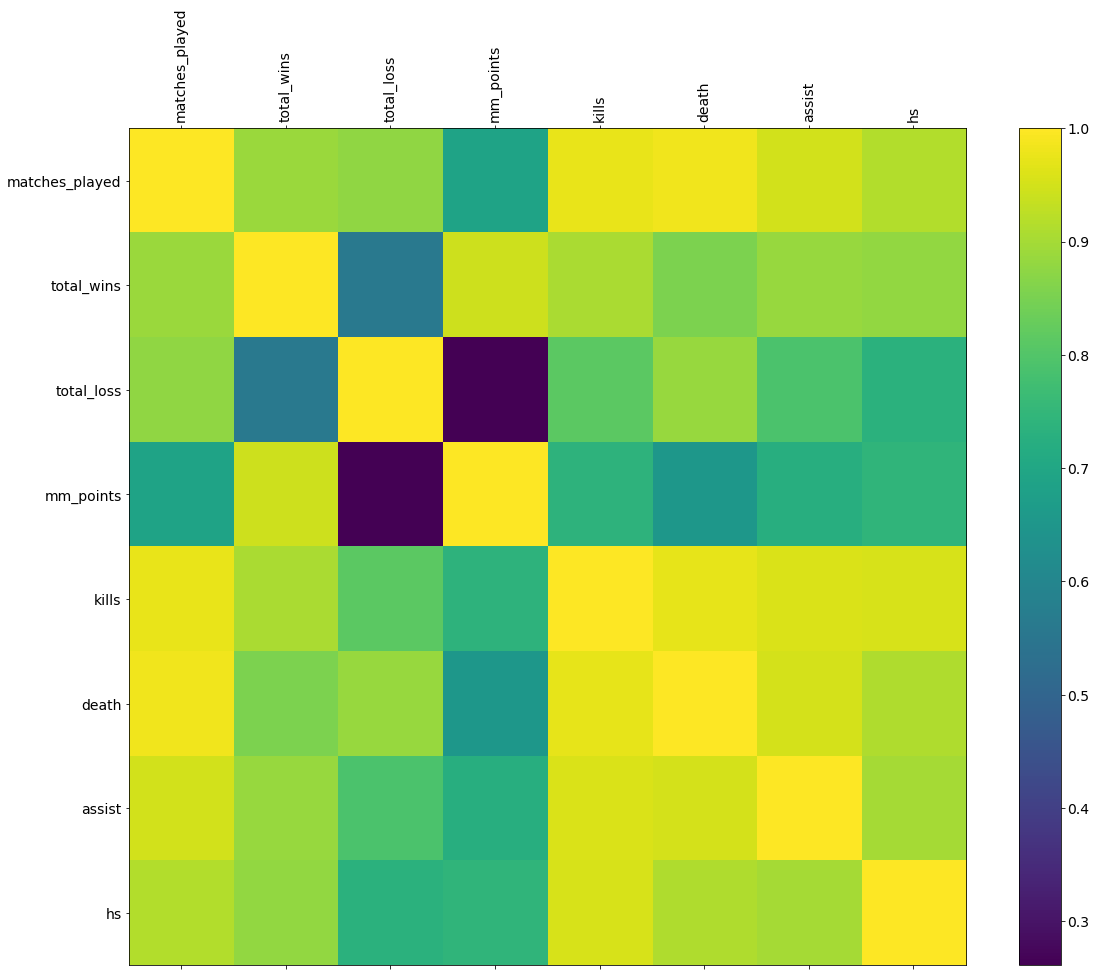

In [51]:
f = plt.figure(figsize=(19, 15))
plt.matshow(mm_stats.corr(), fignum=f.number)
plt.xticks(range(mm_stats.shape[1]), mm_stats.columns, fontsize=14, rotation=90)
plt.yticks(range(mm_stats.shape[1]), mm_stats.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.savefig("matchmaking_corr.png")

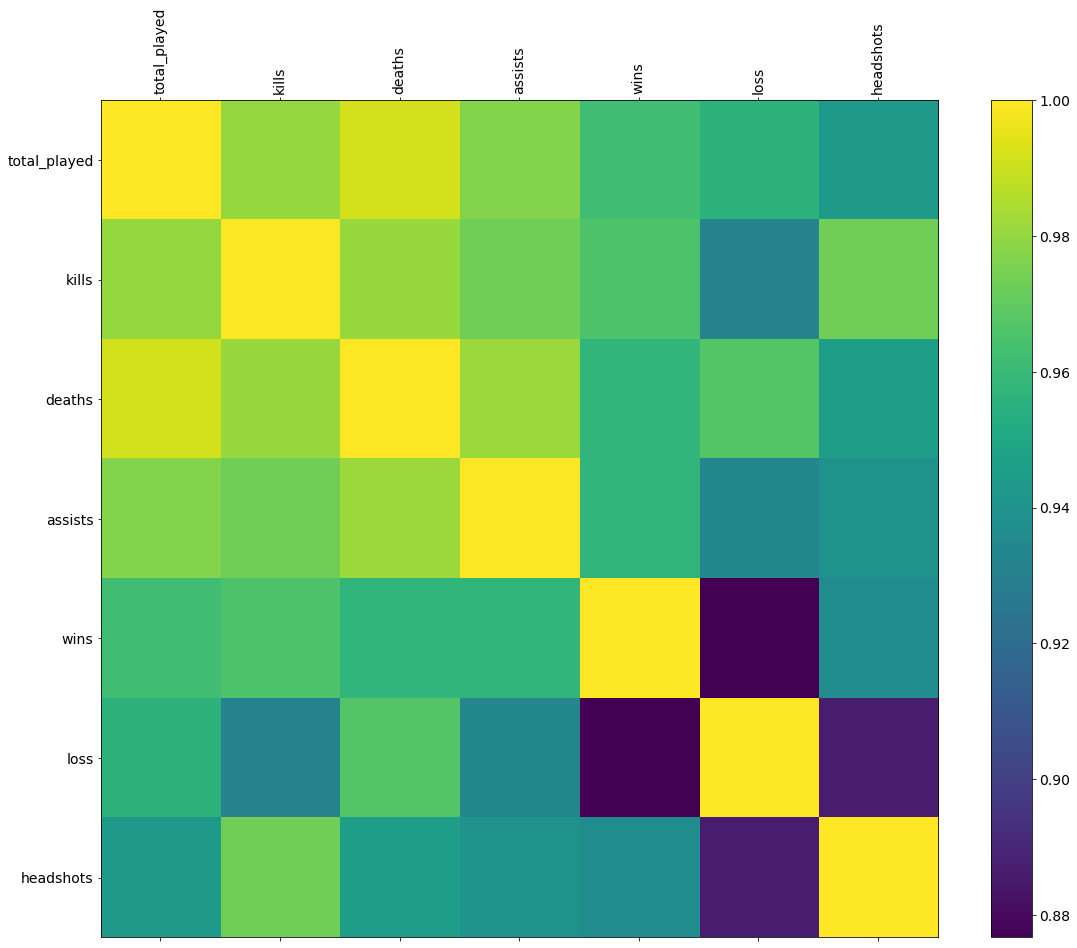

In [58]:
f = plt.figure(figsize=(19, 15))
plt.matshow(mth_stats.corr(), fignum=f.number)
plt.xticks(range(mth_stats.shape[1]), mth_stats.columns, fontsize=14, rotation=90)
plt.yticks(range(mth_stats.shape[1]), mth_stats.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.savefig("monthly_corr.png")

In [63]:
mmcorr = mm_stats.corr()
mmcorr.style.background_gradient()

,matches_played,total_wins,total_loss,mm_points,kills,death,assist,hs
matches_played,1.000000,0.887964,0.878356,0.689930,0.974546,0.984908,0.949598,0.914814
total_wins,0.887964,1.000000,0.560330,0.944465,0.906658,0.855386,0.884865,0.881565
total_loss,0.878356,0.560330,1.000000,0.261150,0.812837,0.885040,0.790564,0.731682
mm_points,0.689930,0.944465,0.261150,1.000000,0.740193,0.651729,0.723895,0.743512
kills,0.974546,0.906658,0.812837,0.740193,1.000000,0.973337,0.956963,0.954986
death,0.984908,0.855386,0.885040,0.651729,0.973337,1.000000,0.953071,0.910926
assist,0.949598,0.884865,0.790564,0.723895,0.956963,0.953071,1.000000,0.901647
hs,0.914814,0.881565,0.731682,0.743512,0.954986,0.910926,0.901647,1.000000


In [64]:
mthcorr = mth_stats.corr()
mthcorr.style.background_gradient()

,total_played,kills,deaths,assists,wins,loss,headshots
total_played,1.000000,0.980313,0.991676,0.977086,0.962017,0.956470,0.943267
kills,0.980313,1.000000,0.981154,0.973452,0.965331,0.931750,0.973025
deaths,0.991676,0.981154,1.000000,0.981392,0.957663,0.967152,0.945501
assists,0.977086,0.973452,0.981392,1.000000,0.957183,0.933927,0.939418
wins,0.962017,0.965331,0.957663,0.957183,1.000000,0.876682,0.936704
loss,0.956470,0.931750,0.967152,0.933927,0.876682,1.000000,0.886583
headshots,0.943267,0.973025,0.945501,0.939418,0.936704,0.886583,1.000000


In [66]:
matchmaking_stats.to_csv('matchmaking_stats.csv', index=False)
monthly_stats.to_csv('monthly_stats.csv', index=False)
players.to_csv('players.csv', index=False)